# 10x RNA-seq clustering analysis and annotation (CCN20230722)

[DESCRIPTION TEXT]

The purpose of this notebook is to provide an overview of how cluster and cluster annotation information is represented through example use cases.

You need to be connected to the internet to run this notebook and have run through the [getting started notebook](https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html).

A detailed cell type [LINK TO CELL TYPE ANNOTATION] is also provided along with data downloads detailing information about the hierarchical membership, anatomical annotation, neurotransmitter type, cell type marker genes, transcription factor and neuropeptide markers, and other metadata types for each cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

pd.set_option('display.max_columns', 500)

We will interact with the data using the **AbcProjectCache**. This cache object tracks which data has been downloaded and serves the path to the requsted data on disk. For metadata, the cache can also directly serve a up a Pandas Dataframe. See the ``getting_started`` notebook for more details on using the cache including installing it if it has not already been.

**Change the download_base variable to where you have downloaded the data in your system.**

In [2]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20241115/manifest.json'

## Data Overview

### Clusters
Each cluster of the final set of 847 clusters is associated with an alias and label. Each row of the dataframe represnts a ***cluster***. Each *cluster* has a *label* (human readable string that is unique in the database), *cluster alias* (in this case a simple integer) and the *number of cells* that has been grouped into the cluster.

In [261]:
metadata_base = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/"
    "metadata/Zeng-Aging-Mouse-10Xv3/20241130"
)
taxonomy_base = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/"
    "metadata/Zeng-Aging-Mouse-WMB-taxonomy/20241130"
)
# abc_cache.list_metadata_files('Zeng-Aging-Mouse-10Xv3')

In [262]:
ls /allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/metadata/Zeng-Aging-Mouse-10Xv3/20241130

cell_annotation_colors.csv*    cluster.csv*  value_sets.csv*
cell_cluster_annotations.csv*  donor.csv*
cell_metadata.csv*             library.csv*


In [263]:
ls /allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mouse_aging_prep/staging/metadata/Zeng-Aging-Mouse-WMB-taxonomy/20241130

aging_degenes.csv*                     cluster_mapping.csv*
cell_cluster_mapping_annotations.csv*  cluster_mapping_pivot.csv*
cell_cross_mapping_annotations.csv*


Below we load information for all of the 847 clusters. 

In [226]:
cluster_info = pd.read_csv(
    metadata_base / 'cluster.csv',
    dtype={'cluster_label': str}
).set_index('cluster_alias')
# mapping_annotations = abc_cache.get_metadata_dataframe(
#     directory='WHB-taxonomy',
#     file_name='cluster_to_cluster_annotation_membership'
# )
cluster_info

,number_of_cells,cluster_label,cluster_order,cluster_name,cluster_color,number_of_adult_cells,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cluster_alias,,,,,,,,,,,,,,,,
1,851,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,183,668,0.215041,0.784959,1.453797,0.539826,unassigned,#DADEDF,Glut,Glut,#2B93DF
2,330,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,160,170,0.484848,0.515152,0.421595,-1.246071,unassigned,#DADEDF,Glut,Glut,#2B93DF
3,589,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,240,349,0.407470,0.592530,0.576896,-0.793616,unassigned,#DADEDF,Glut,Glut,#2B93DF
4,207,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,107,100,0.516908,0.483092,0.371035,-1.430373,unassigned,#DADEDF,Glut,Glut,#2B93DF
5,2141,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,655,1486,0.305932,0.694068,0.900735,-0.150825,unassigned,#DADEDF,Glut,Glut,#2B93DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,2640,CS20241021_0843,842,843_Microglia NN_1,#a88b30,71,2569,0.026894,0.973106,20.304439,4.343723,aging-enriched,#CD6828,No-NT,No-NT,#666666
844,771,CS20241021_0844,843,844_Microglia NN_1,#df92c3,284,487,0.368353,0.631647,0.911851,-0.133131,unassigned,#DADEDF,No-NT,No-NT,#666666
845,3030,CS20241021_0845,844,845_BAM NN_1,#a1adea,1462,1568,0.482508,0.517492,0.556218,-0.846279,unassigned,#DADEDF,No-NT,No-NT,#666666


The other important DataFrame for the taxonomy is the cluster_mapping metadata. This maps the above clusters into the full WMB taxonomy.

In [227]:
cluster_mapping = pd.read_csv(
    taxonomy_base / 'cluster_mapping.csv',
    dtype={'cluster_label': str}
).set_index('cluster_alias')
# mapping_annotations = abc_cache.get_metadata_dataframe(
#     directory='WHB-taxonomy',
#     file_name='cluster_to_cluster_annotation_membership'
# )
cluster_mapping

,cluster_label,cluster_order,cluster_name,cluster_color,cluster_annotation_term_label,cluster_annotation_term_name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet
cluster_alias,,,,,,,,,,,,,
1,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,CS20230722_SUPT_0001,0001 CLA-EPd-CTX Car3 Glut_1,CCN20230722_SUPT,CS20230722_SUBC_001,CCN20230722_SUBC,3,0,supertype,#99822E
2,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563
3,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563
4,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563
5,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,CS20241021_0843,842,843_Microglia NN_1,#a88b30,CS20230722_CLAS_34,34 Immune,CCN20230722_CLAS,NaN,NaN,1,33,class,#825f45
844,CS20241021_0844,843,844_Microglia NN_1,#df92c3,CS20230722_CLAS_34,34 Immune,CCN20230722_CLAS,NaN,NaN,1,33,class,#825f45
845,CS20241021_0845,844,845_BAM NN_1,#a1adea,CS20230722_CLAS_34,34 Immune,CCN20230722_CLAS,NaN,NaN,1,33,class,#825f45


## Example use cases
### Aggregating cluster and cells counts per term

Now that we have information associated in each cluster and the full heirarchy of the taxonomy loaded, we can merge the two tables on their index (cluster_alias), producing a dataset describing the taxonomy.

In [228]:
membership = cluster_mapping.join(cluster_info, rsuffix='_cl_info')
membership.head()

,cluster_label,cluster_order,cluster_name,cluster_color,cluster_annotation_term_label,cluster_annotation_term_name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet,number_of_cells,cluster_label_cl_info,cluster_order_cl_info,cluster_name_cl_info,cluster_color_cl_info,number_of_adult_cells,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cluster_alias,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,CS20230722_SUPT_0001,0001 CLA-EPd-CTX Car3 Glut_1,CCN20230722_SUPT,CS20230722_SUBC_001,CCN20230722_SUBC,3,0,supertype,#99822E,851,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,183,668,0.215041,0.784959,1.453797,0.539826,unassigned,#DADEDF,Glut,Glut,#2B93DF
2,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,330,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,160,170,0.484848,0.515152,0.421595,-1.246071,unassigned,#DADEDF,Glut,Glut,#2B93DF
3,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,589,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,240,349,0.407470,0.592530,0.576896,-0.793616,unassigned,#DADEDF,Glut,Glut,#2B93DF
4,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,207,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,107,100,0.516908,0.483092,0.371035,-1.430373,unassigned,#DADEDF,Glut,Glut,#2B93DF
5,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,CS20230722_SUPT_0003,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,2141,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,655,1486,0.305932,0.694068,0.900735,-0.150825,unassigned,#DADEDF,Glut,Glut,#2B93DF


One final set of data to create is to calculate the number of clusters that are members of a given supertype, subclass, and class in the taxonomy.

In [229]:
# Count the number of clusters associated with each cluster annotation term
term_cluster_count = membership.groupby(['cluster_annotation_term_label'])[['cluster_label']].count()
term_cluster_count.columns = ['number_of_clusters']
term_cluster_count.head()

,number_of_clusters
cluster_annotation_term_label,
CS20230722_CLAS_01,156
CS20230722_CLAS_02,38
CS20230722_CLAS_03,1
CS20230722_CLAS_04,6
CS20230722_CLAS_05,4


In [230]:
# Join counts with the term dataframe
term_by_label = membership.set_index('cluster_annotation_term_label')
term_with_counts = term_by_label.join(term_cluster_count)
term_with_counts.head()

,cluster_label,cluster_order,cluster_name,cluster_color,cluster_annotation_term_name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet,number_of_cells,cluster_label_cl_info,cluster_order_cl_info,cluster_name_cl_info,cluster_color_cl_info,number_of_adult_cells,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color,number_of_clusters
cluster_annotation_term_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS20230722_SUPT_0001,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,0001 CLA-EPd-CTX Car3 Glut_1,CCN20230722_SUPT,CS20230722_SUBC_001,CCN20230722_SUBC,3,0,supertype,#99822E,851,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,183,668,0.215041,0.784959,1.453797,0.539826,unassigned,#DADEDF,Glut,Glut,#2B93DF,1
CS20230722_SUPT_0003,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,330,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,160,170,0.484848,0.515152,0.421595,-1.246071,unassigned,#DADEDF,Glut,Glut,#2B93DF,5
CS20230722_SUPT_0003,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,589,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,240,349,0.407470,0.592530,0.576896,-0.793616,unassigned,#DADEDF,Glut,Glut,#2B93DF,5
CS20230722_SUPT_0003,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,207,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,107,100,0.516908,0.483092,0.371035,-1.430373,unassigned,#DADEDF,Glut,Glut,#2B93DF,5
CS20230722_SUPT_0003,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,0003 IT EP-CLA Glut_1,CCN20230722_SUPT,CS20230722_SUBC_002,CCN20230722_SUBC,3,2,supertype,#994563,2141,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,655,1486,0.305932,0.694068,0.900735,-0.150825,unassigned,#DADEDF,Glut,Glut,#2B93DF,5


Let's visualize cluster and cells counts for of the classification levels using bar plots.

In [145]:
def bar_plot_by_level_and_type(df, level, fig_width = 8.5, fig_height = 4):
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for idx, ctype in enumerate(['clusters', 'cells']):

        pred = (df['cluster_annotation_term_set_name'] == level)
        names = df[pred]['cluster_annotation_term_name']
        counts = df[pred]['number_of_%s' % ctype]
        colors = df[pred]['color_hex_triplet']
        
        ax[idx].barh(names, counts, color=colors)
        ax[idx].set_title('Number of %s by %s' % (ctype,level)),
        ax[idx].set_xscale('log')

        if idx > 0 :
            ax[idx].set_yticklabels([])

    plt.show()


def bar_plot_by_level_and_type_neurotransmitter(df, fig_width = 8.5, fig_height = 4):
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for idx, ctype in enumerate(['clusters', 'cells']):

        names = df['neurotransmitter_label']
        counts = df['number_of_%s' % ctype]
        colors = df['neurotransmitter_color']
        
        ax[idx].barh(names, counts, color=colors)
        ax[idx].set_title('Number of %s by %s' % (ctype,level)),
        ax[idx].set_xscale('log')

        if idx > 0 :
            ax[idx].set_yticklabels([])

    plt.show()

#### Neurotransmitter cluster and  cell counts
As seen below, most of the clusters in the study are glutamatergic, while the majority of cells are Nonueronal.

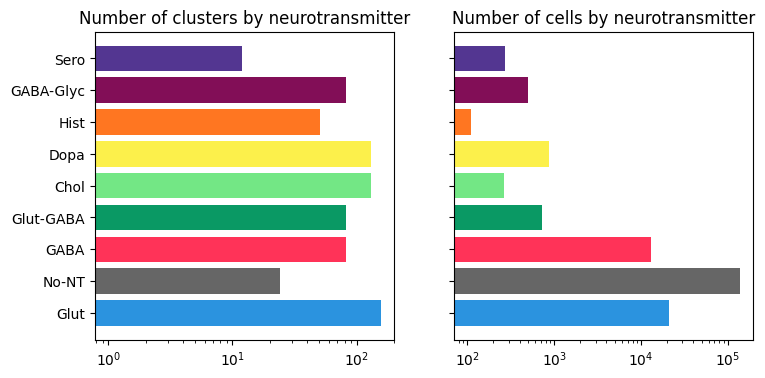

In [146]:
bar_plot_by_level_and_type_neurotransmitter(term_with_counts)

#### Class level cluster and cell counts
Class "01 IT-ET" contains the largest number of clusters (~100), while class "30 Astro-Epen" contains the largest number of cells.

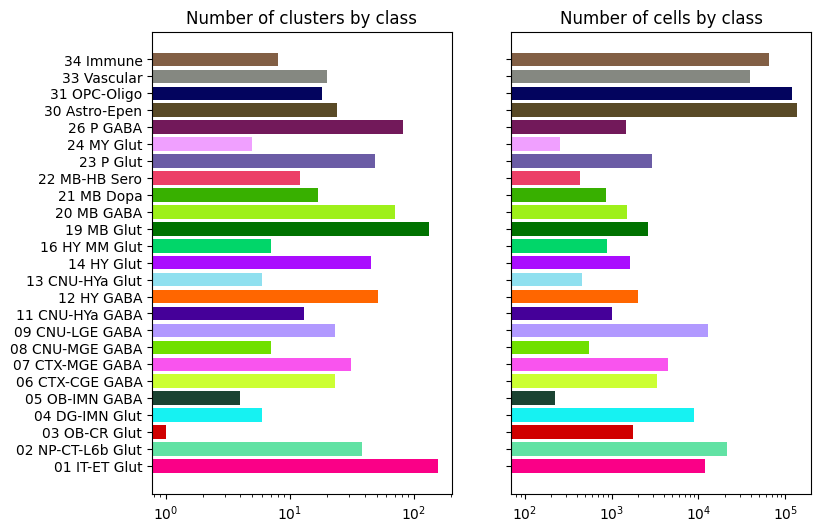

In [148]:
bar_plot_by_level_and_type(term_with_counts, 'class', 8.5, 6)

### Visualizing cluster and term distributions

We can explore the relationship and distribution of clusters between term sets by creating a pivot table using pandas groupby fuunction. Each row of the resulting dataframe represents a cluster, each column represents a term set and the value in the table is the name of the term that has been associated with the cluster for that specific term set.

In [163]:
pivot = membership.groupby(['cluster_alias', 'cluster_annotation_term_set_name'])['cluster_annotation_term_name'].first().unstack()
pivot = pivot.join(cluster_info)
pivot

,class,subclass,supertype,number_of_cells,cluster_label,cluster_order,cluster_name,cluster_color,number_of_adult_cells,number_of_aged_cells,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cluster_alias,,,,,,,,,,,,,,,,,,,
1,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,851,CS20241021_0001,0,1_CLA-EPd-CTX Car3 Glut_1,#f7c27a,183,668,0.215041,0.784959,1.453797,0.539826,unassigned,#DADEDF,Glut,Glut,#2B93DF
2,01 IT-ET Glut,002 IT EP-CLA Glut,0003 IT EP-CLA Glut_1,330,CS20241021_0002,1,2_IT EP-CLA Glut_1,#5c1a34,160,170,0.484848,0.515152,0.421595,-1.246071,unassigned,#DADEDF,Glut,Glut,#2B93DF
3,01 IT-ET Glut,002 IT EP-CLA Glut,0003 IT EP-CLA Glut_1,589,CS20241021_0003,2,3_IT EP-CLA Glut_1,#b96cf0,240,349,0.407470,0.592530,0.576896,-0.793616,unassigned,#DADEDF,Glut,Glut,#2B93DF
4,01 IT-ET Glut,002 IT EP-CLA Glut,0003 IT EP-CLA Glut_1,207,CS20241021_0004,3,4_IT EP-CLA Glut_1,#bff691,107,100,0.516908,0.483092,0.371035,-1.430373,unassigned,#DADEDF,Glut,Glut,#2B93DF
5,01 IT-ET Glut,002 IT EP-CLA Glut,0003 IT EP-CLA Glut_1,2141,CS20241021_0005,4,5_IT EP-CLA Glut_1,#39fbfa,655,1486,0.305932,0.694068,0.900735,-0.150825,unassigned,#DADEDF,Glut,Glut,#2B93DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,34 Immune,334 Microglia NN,1194 Microglia NN_1,2640,CS20241021_0843,842,843_Microglia NN_1,#a88b30,71,2569,0.026894,0.973106,20.304439,4.343723,aging-enriched,#CD6828,No-NT,No-NT,#666666
844,34 Immune,334 Microglia NN,1194 Microglia NN_1,771,CS20241021_0844,843,844_Microglia NN_1,#df92c3,284,487,0.368353,0.631647,0.911851,-0.133131,unassigned,#DADEDF,No-NT,No-NT,#666666
845,34 Immune,335 BAM NN,1195 BAM NN_1,3030,CS20241021_0845,844,845_BAM NN_1,#a1adea,1462,1568,0.482508,0.517492,0.556218,-0.846279,unassigned,#DADEDF,No-NT,No-NT,#666666


We can also obtain a cluster annotation color pivot table in the same way.

In [165]:
color = membership.groupby(['cluster_alias','cluster_annotation_term_set_name'])['color_hex_triplet'].first().unstack().fillna('#f9f9f9')
color.columns = ['%s_color' % x for x in color.columns]
color

,class_color,subclass_color,supertype_color
cluster_alias,,,
1,#FA0087,#64c2fc,#99822E
2,#FA0087,#1F665D,#994563
3,#FA0087,#1F665D,#994563
4,#FA0087,#1F665D,#994563
5,#FA0087,#1F665D,#994563
...,...,...,...
843,#825f45,#CC1F4E,#62CC3D
844,#825f45,#CC1F4E,#62CC3D
845,#825f45,#66493D,#32662E


### Plotting distributions of clusters and cells by taxonomy level

For a given pair of term sets A and B, we compute a cluster count table where the rows are terms in term set A, columns are terms in term set B and the table values being the number of clusters that is shared between the terms. 

Function *stacked_bar_distribution* takes the results of *distribution* as input to create distribution stacked bar plot.


In [270]:
def stacked_bar_distribution(AxB, B_names, B_colors, fig_width = 6, fig_height = 6):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    bottom = np.zeros(len(AxB))

    for i, col in enumerate(AxB.columns):
        ax.barh(AxB.index, AxB[col], left=bottom, label=col[1], color=B_colors.loc[col[1]])
        bottom += np.array(AxB[col])

    ax.set_title('Distribution of %s in each %s' % (AxB.columns.names[1], AxB.index.name))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
    return fig, ax

#### Distribution of neurotransmitter clusters in each class

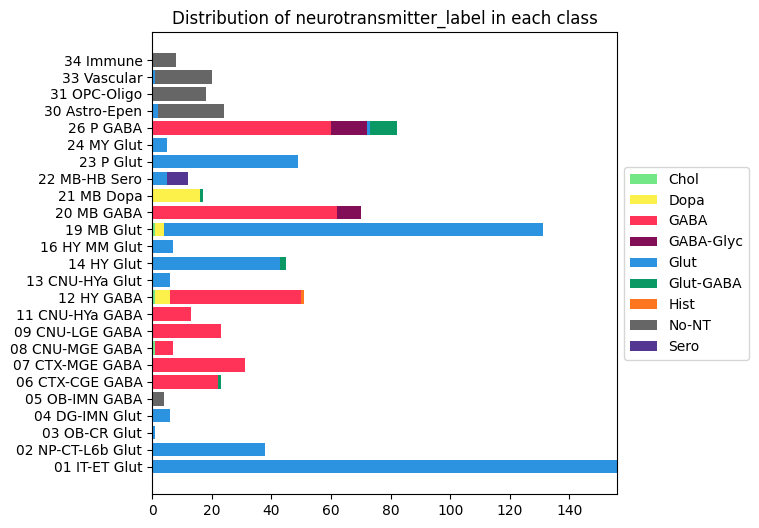

In [271]:
AxB = pivot.groupby(['class', 'neurotransmitter_label'])[['cluster_name']].count()
AxB.columns = ['number_of_clusters']
AxB = AxB.unstack().fillna(0)
B_names = pivot['neurotransmitter_label'].unique()
B_colors = pd.Series(data=pivot['neurotransmitter_color'].unique(), index=B_names)
fig, ax = stacked_bar_distribution(AxB, B_names, B_colors, 6, 6)

#### Distribution of age enriched vs age depleted clusters

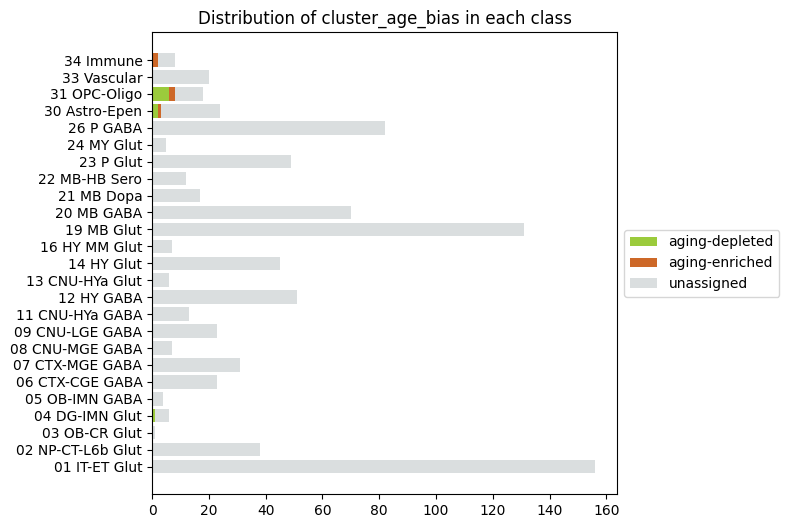

In [272]:
AxB = pivot.groupby(['class', 'cluster_age_bias'])[['cluster_name']].count()
AxB.columns = ['number_of_clusters']
AxB = AxB.unstack().fillna(0)
B_names = pivot['cluster_age_bias'].unique()
B_colors = pd.Series(data=pivot['cluster_age_bias_color'].unique(), index=B_names)
fig, ax = stacked_bar_distribution(AxB, B_names, B_colors, 6, 6)

#### Distribution of adult and aged cells

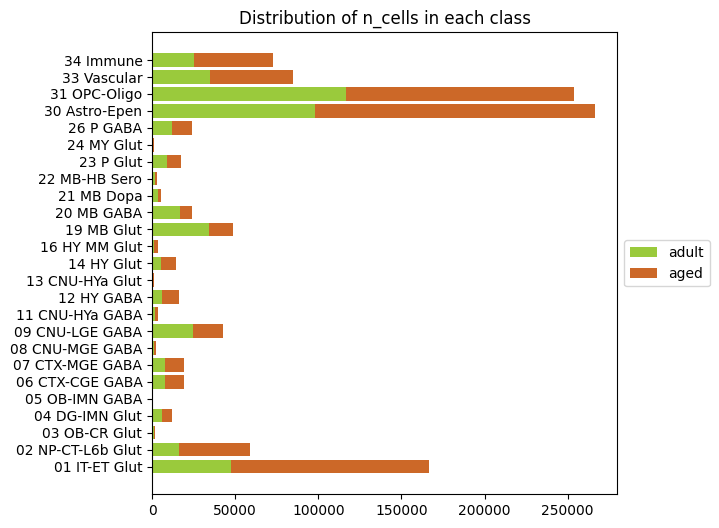

In [273]:
n_adult = pivot.groupby(['class'])[['number_of_adult_cells']].sum()
n_aged = pivot.groupby(['class'])[['number_of_aged_cells']].sum()
adult_vs_aged = n_adult.join(n_aged)
adult_vs_aged.columns = pd.MultiIndex.from_tuples(
    [('n_cells', 'adult'), ('n_cells', 'aged')],
    names=[None, 'n_cells'])
B_names = ['adult', 'aged']
B_colors = pd.Series(data=['#9ACA3C', '#CC6828'], index=B_names)
fig, ax = stacked_bar_distribution(adult_vs_aged, B_names, B_colors, 6, 6)

### Visualizing the mouse whole brain taxonomy

Term sets: class, subclass, supertype and cluster forms a four level mouse whole brain taxonomy. We can visualized the taxonomy as a sunburst diagram that shows the single inheritance hierarchy through a series of rings, that are sliced for each annotation term. Each ring corresponds to a level in the hierarchy. We have ordered the rings so that the class level is the outer most ring so that we can add in labels. Rings are sliced up and divided based on their hierarchical relationship to the parent slice. The angle of each slice is proportional to the number of clusters belonging to the term.

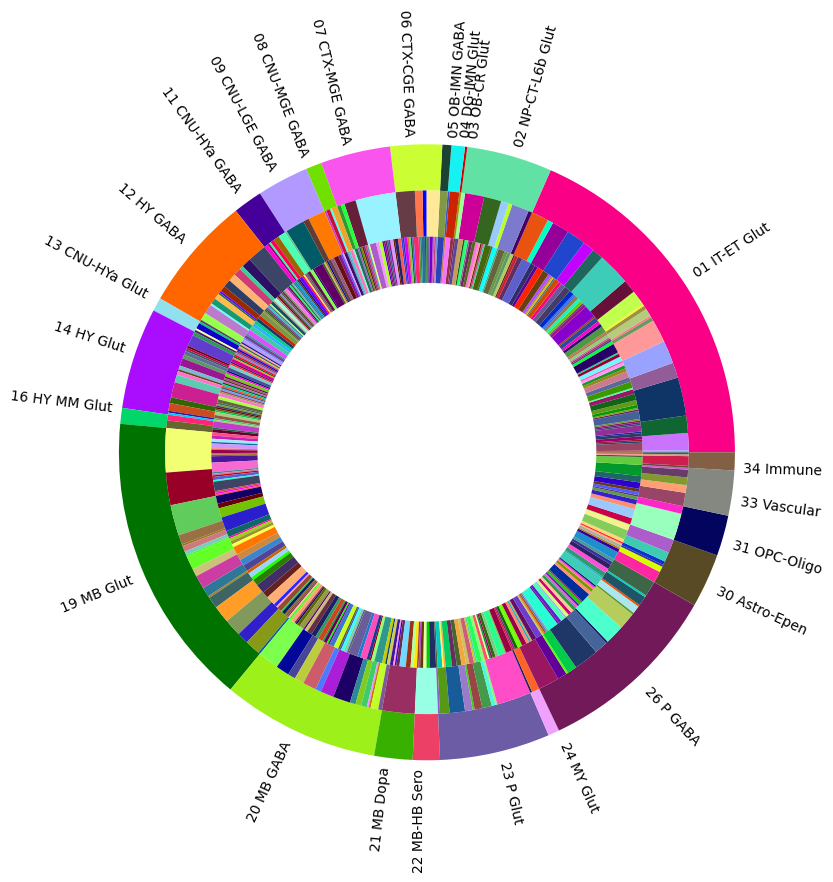

In [159]:
levels = ['class', 'subclass', 'supertype']
df = {}

for lvl in levels:
    pred = term_with_counts['cluster_annotation_term_set_name'] == lvl
    df[lvl] = term_with_counts[pred]
    df[lvl] = df[lvl].sort_values(['parent_term_label'])
    df[lvl] = df[lvl][~df[lvl].index.duplicated(keep='first')]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
size = 0.15

for i, lvl in enumerate(levels):
    
    if lvl == 'class':
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               labels=df[lvl]['cluster_annotation_term_name'],
               rotatelabels=True,
               labeldistance=1.025,
               radius=1,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)
    else:
        ax.pie(df[lvl]['number_of_clusters'],
               colors=df[lvl]['color_hex_triplet'],
               radius=1-i*size,
               wedgeprops=dict(width=size, edgecolor=None),
               startangle=0)

plt.show()